In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install searchtweets


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [8]:
api_key = 'vcCmOETCASdUd0CpAdCtAT1H7'

api_secret = '8KEdeRxbIiQdRzC5oQFpJreC6b87I3LN2Sq6cwLXlkBB1aEGTw'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAKnFRAEAAAAA0WTW5LZ0FZm0YaTCHQpjYW2BzmI%3DAis5txxF8CKfT5UfsbcG9UznM61bmjCuN6FqlZwqJIjycjw9Hl'

access_token = '1410231389220376584-B2PrnZFEXKU6coWb3AEWGPODV4YJ9F'

access_token_secret = 'PPwZ8sh80xzCPochgHytGCzk3USP2RQkmUeRPqq2LqiHR'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [18]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: tesla
Please enter how many tweets to analyze: 2000


In [ ]:
API.user_timeline()



In [33]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, api.user_timeline, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
time = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    time.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: tesla
Please enter how many tweets to analyze: 2000


TypeError: search_tweets() got multiple values for argument 'q'

In [19]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  519
negative number:  364
neutral number:  1117


In [20]:
tweet_list


,0
0,RT @MitchellAbbys: @crytosapien @Thomahawx @Yo...
1,RT @MqUkc: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอมเ...
2,RT @Tesla: 40 Megapack units balance the grid ...
3,@CryptoXMad This is amazing! Look at https://t...
4,RT @NowTui: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอม...
...,...
1995,RT @TOrynski: I am watching a movie clips abou...
1996,RT @christgoal: Win a new Tesla Model 3 or $50...
1997,👌 Tesla realmente era un «científico loco» arq...
1998,https://t.co/SHqdpbxsro : 9826fc00-0bfd-4fbd-b...


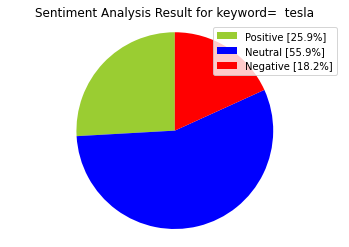

In [21]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()


In [22]:
tweet_list.drop_duplicates(inplace = True)


In [23]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @MitchellAbbys: @crytosapien @Thomahawx @Yo...,RT @MitchellAbbys: @crytosapien @Thomahawx @Yo...
1,RT @MqUkc: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอมเ...,RT @MqUkc: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอมเ...
2,RT @Tesla: 40 Megapack units balance the grid ...,RT @Tesla: 40 Megapack units balance the grid ...
3,@CryptoXMad This is amazing! Look at https://t...,@CryptoXMad This is amazing! Look at https://t...
4,RT @NowTui: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอม...,RT @NowTui: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอม...
...,...,...
1989,@JoshhRod_ @defnotrick @snot https://t.co/Ppiz...,@JoshhRod_ @defnotrick @snot https://t.co/Ppiz...
1990,RT @Tesla: The 7-seater option is now availabl...,RT @Tesla: The 7-seater option is now availabl...
1992,@TradesDiego Oh for sure. Each week has a cycl...,@TradesDiego Oh for sure. Each week has a cycl...
1997,👌 Tesla realmente era un «científico loco» arq...,👌 Tesla realmente era un «científico loco» arq...


In [24]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @MitchellAbbys: @crytosapien @Thomahawx @Yo...,light317 volt voltichange vdsc volt...
1,RT @MqUkc: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอมเ...,123...
2,RT @Tesla: 40 Megapack units balance the grid ...,40 megapack units balance the grid in lessine...
3,@CryptoXMad This is amazing! Look at https://t...,this is amazing look at
4,RT @NowTui: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอม...,123...
5,RT @MohammedOvii: @udiWertheimer Holiday givea...,holiday giveaway has started
8,What a joke.\nAnd whats more funny: the averag...,what a joke and whats more funny the average...
10,RT @Valkyrae: currently being hacked on YouTub...,currently being hacked on youtube and they ch...
11,Tesla stock down 51% this year. @elonmusk left...,tesla stock down 51 this year left a money...
12,"Tesla Sales of Chinese-Made Cars Hit Record, a...",tesla sales of chinese made cars hit record a...


In [34]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

KeyboardInterrupt: 

### Savind the DATA FRAME

In [29]:
tesla_tweets = tw_list

In [30]:
tesla_tweets

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MitchellAbbys: @crytosapien @Thomahawx @Yo...,light317 volt voltichange vdsc volt...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @MqUkc: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอมเ...,123...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @Tesla: 40 Megapack units balance the grid ...,40 megapack units balance the grid in lessine...,0.00,0.000000,positive,0.000,0.896,0.104,0.2732
3,@CryptoXMad This is amazing! Look at https://t...,this is amazing look at,0.60,0.900000,positive,0.000,0.513,0.487,0.5859
4,RT @NowTui: ✅ กดรีทวิต กดติดตาม หัวใจ ❤️\nคอม...,123...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
1989,@JoshhRod_ @defnotrick @snot https://t.co/Ppiz...,nikola tesla vs thomas edison epic r...,0.10,0.400000,negative,0.224,0.776,0.000,-0.3818
1990,RT @Tesla: The 7-seater option is now availabl...,the 7 seater option is now available for orde...,0.40,0.400000,neutral,0.000,1.000,0.000,0.0000
1992,@TradesDiego Oh for sure. Each week has a cycl...,oh for sure each week has a cycle typically...,0.25,0.444444,positive,0.000,0.780,0.220,0.5859
1997,👌 Tesla realmente era un «científico loco» arq...,tesla realmente era un cient fico loco arq...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000


In [31]:
tesla_tweets.to_csv('tesla_tweets.csv')